<h1> Chargement et exploration du modèle </h1> 

In [2]:
import pandas as pd


di="DATASET INONDATIONS"
print(di)

# Chargement du dataset
# iris = load_iris()
df = pd.read_csv("datas/flood.csv")

# Affichage des 1eres lignes
ap="Aperçu des premières lignes:\n"
#print(ap)
print(ap,df.head())

io = "Informations sur la dataset"
print(io, df.info())

DATASET INONDATIONS
Aperçu des premières lignes:
    MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachm

<h1> Nettoyage des données </h1>

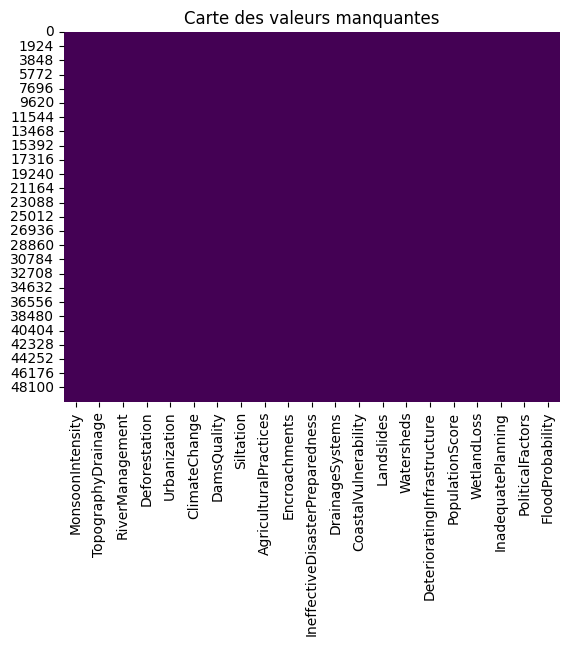

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Carte des valeurs manquantes")
plt.show()

In [4]:
# Duplicates
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


In [5]:
df.dtypes

MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

In [9]:
import numpy as np

target_col = "FloodProbability"
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != target_col]

# Supprimer les outliers pour obtenir une meilleure estimation des tendances centrales
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")

MonsoonIntensity: 686 outliers
TopographyDrainage: 711 outliers
RiverManagement: 661 outliers
Deforestation: 682 outliers
Urbanization: 687 outliers
ClimateChange: 647 outliers
DamsQuality: 741 outliers
Siltation: 671 outliers
AgriculturalPractices: 683 outliers
Encroachments: 688 outliers
IneffectiveDisasterPreparedness: 656 outliers
DrainageSystems: 731 outliers
CoastalVulnerability: 747 outliers
Landslides: 645 outliers
Watersheds: 686 outliers
DeterioratingInfrastructure: 663 outliers
PopulationScore: 677 outliers
WetlandLoss: 674 outliers
InadequatePlanning: 670 outliers
PoliticalFactors: 722 outliers


In [11]:
# Enlever les outliers
df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_clean[col] = df_clean[col].clip(lower, upper)

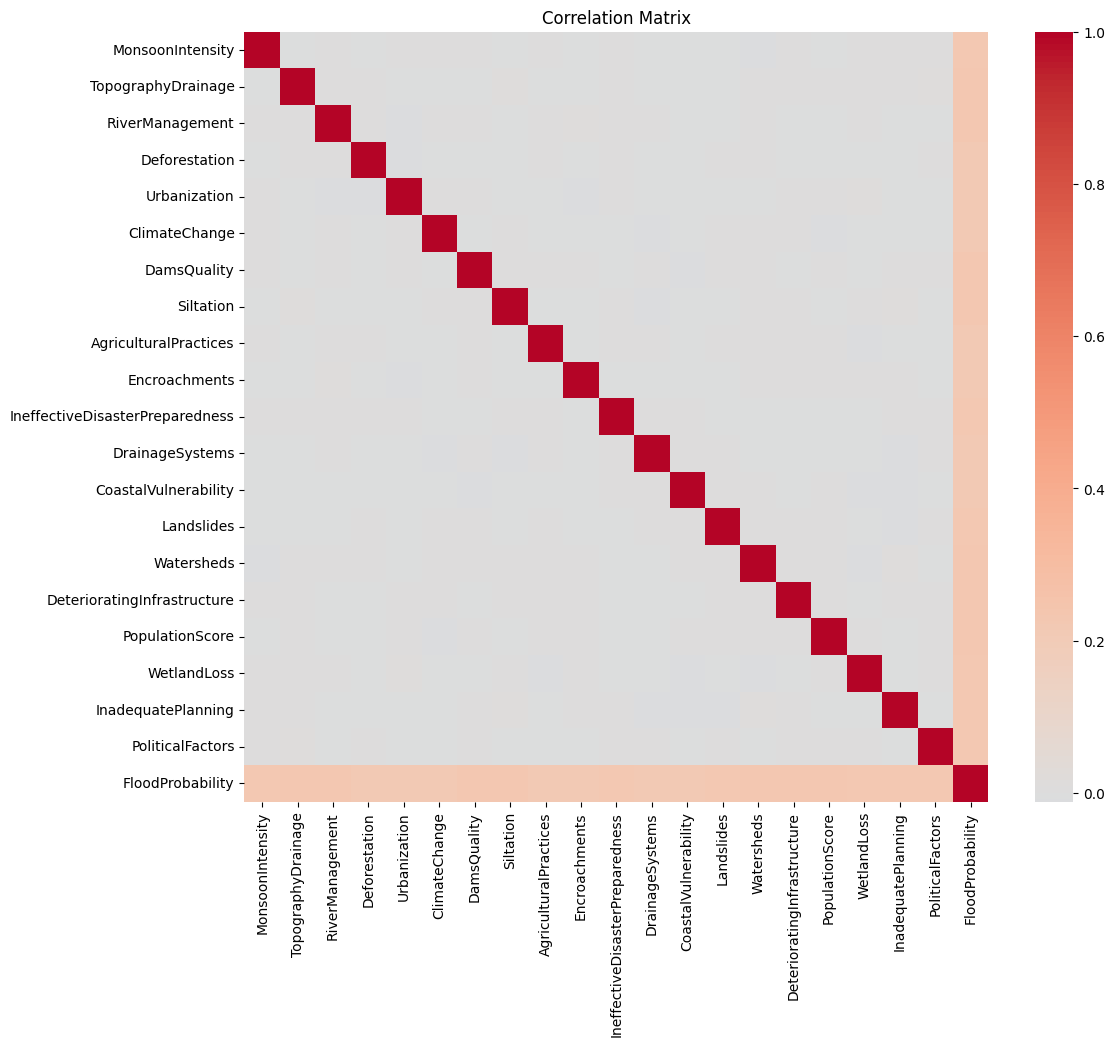

In [28]:
# Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(df_clean.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

<h1> Découpage et Normalisation des données </h1>

In [13]:
from sklearn.model_selection import train_test_split

# Features & Target
X = df_clean.drop("FloodProbability", axis=1)
y = df_clean["FloodProbability"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(40000, 20) (10000, 20)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1> Choix et entraînement du modèle </h1>

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Coefficients
print("Intercept:", model.intercept_)
print("Number of coefficients:", len(model.coef_))

Intercept: 0.49951862500000005
Number of coefficients: 20


<h1> Evaluation du modèle </h1>

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 1.4308201409317556e-05
RMSE: 0.003782618327206375
MAE: 0.0021898193588868304
R2 Score: 0.9942550857985021


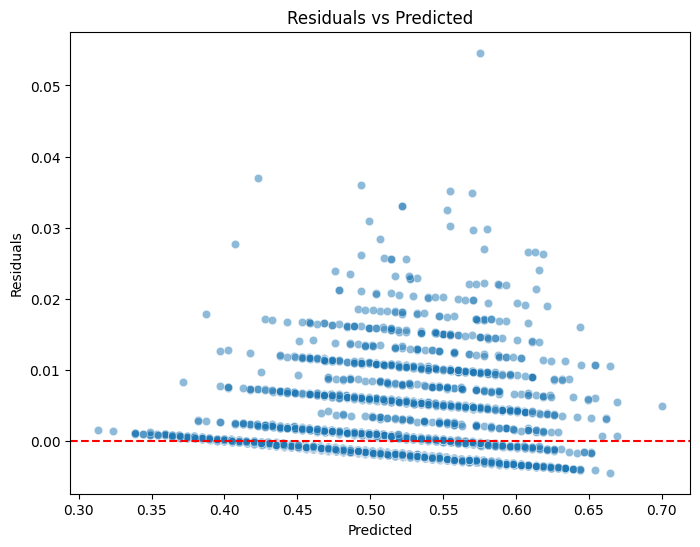

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

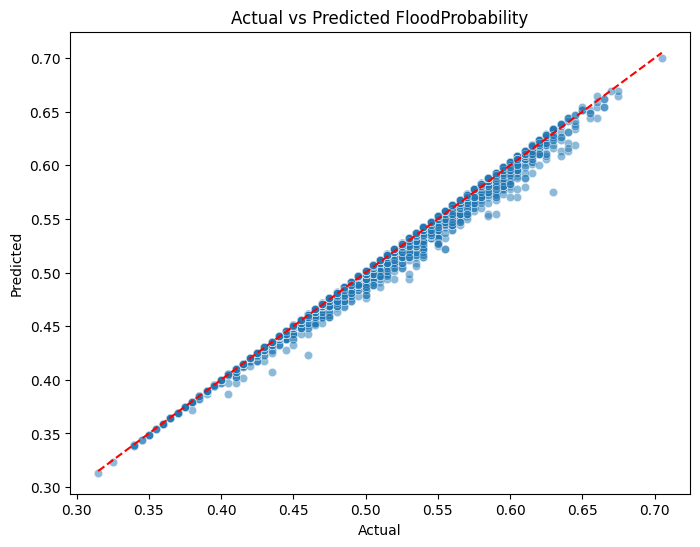

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted FloodProbability")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [26]:
example_input = pd.DataFrame([{
    "MonsoonIntensity": 7,
    "TopographyDrainage": 5,
    "RiverManagement": 6,
    "Deforestation": 7,
    "Urbanization": 6,
    "ClimateChange": 7,
    "DamsQuality": 5,
    "Siltation": 6,
    "AgriculturalPractices": 6,
    "Encroachments": 5,
    "IneffectiveDisasterPreparedness": 6,
    "DrainageSystems": 6,
    "CoastalVulnerability": 5,
    "Landslides": 5,
    "Watersheds": 6,
    "DeterioratingInfrastructure": 6,
    "PopulationScore": 7,
    "WetlandLoss": 6,
    "InadequatePlanning": 6,
    "PoliticalFactors": 5
}])

# 🔍 Predict probability for this location
example_input_scaled = scaler.transform(example_input)
flood_probability = model.predict(example_input_scaled)[0]
print(f"🌊 Predicted Flood Probability: {flood_probability:.4f}")

🌊 Predicted Flood Probability: 0.5931
